In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
listings = pd.read_csv("C:/Users/STARIZ.PK/Desktop/DA_COURSE/listingssummary.csv")

### Availability Analysis:

##### Which listings are available or are not available for the next two years?

In [3]:
available_for_2_years = listings[(listings['availability_365'] >= 730) | (listings['price'].isna())]
not_available_for_2_years = listings[(listings['availability_365'] < 730) & (~listings['price'].isna())]

C:\Users\STARIZ.PK\AppData\Local\Temp\ipykernel_10172\3126898439.py:7: UserWarning: Glyph 133 (\x85) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


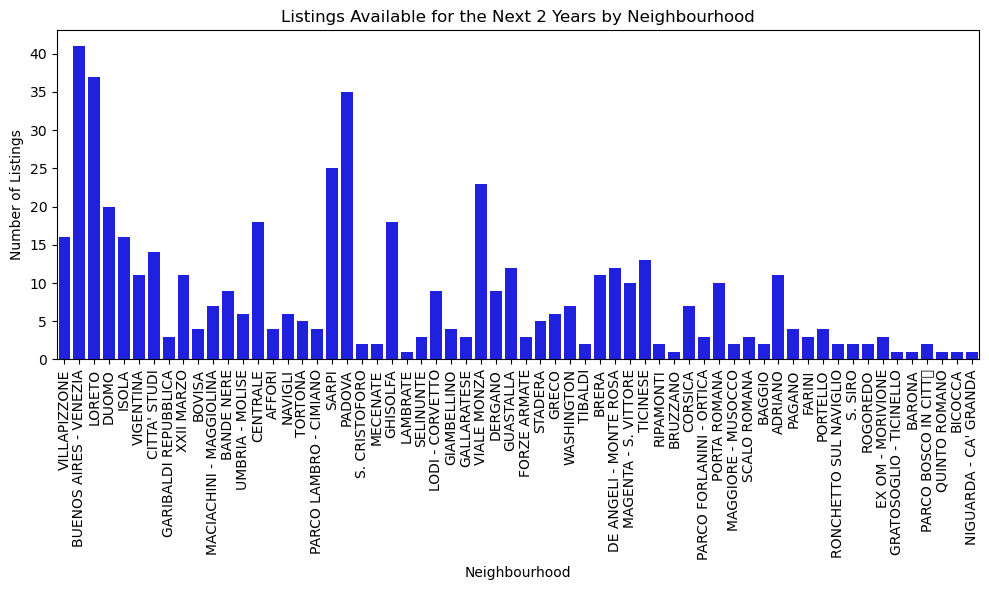

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(data=available_for_2_years, x='neighbourhood', color='blue')
plt.title('Listings Available for the Next 2 Years by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### The bar graph illustrates the distribution of available listings for the next 2 years across different neighborhoods. Notably, the Buenos Aires - Venezia area stands out with the highest number of listings, followed by neighborhoods like Loreto and Centrale. This suggests a relatively higher availability of listings in the Buenos Aires - Venezia area compared to others in the dataset.

##### Buenos Aires - Venezia, situated in the north-east of the city, adjacent to the historic center, boasts a vibrant atmosphere. Its blend of neoclassical architecture and international ambiance, accentuated by diverse ethnic cuisine venues, makes it an attractive destination. Moreover, the neighborhood's embrace of diversity is evident in its LGBTQ+ friendly establishments. Adding to its allure is Corso Buenos Aires, a renowned shopping street, further enhancing its appeal.

##### For Airbnb hosts, having a significant number of listings available in such a sought-after area over the next two years presents a strategic advantage. It positions them for potentially higher booking rates and revenue generation, given the neighborhood's popularity and accessibility via surface transport options like trams and buses.

## Price Analysis:

### Price distribution for different room types:

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


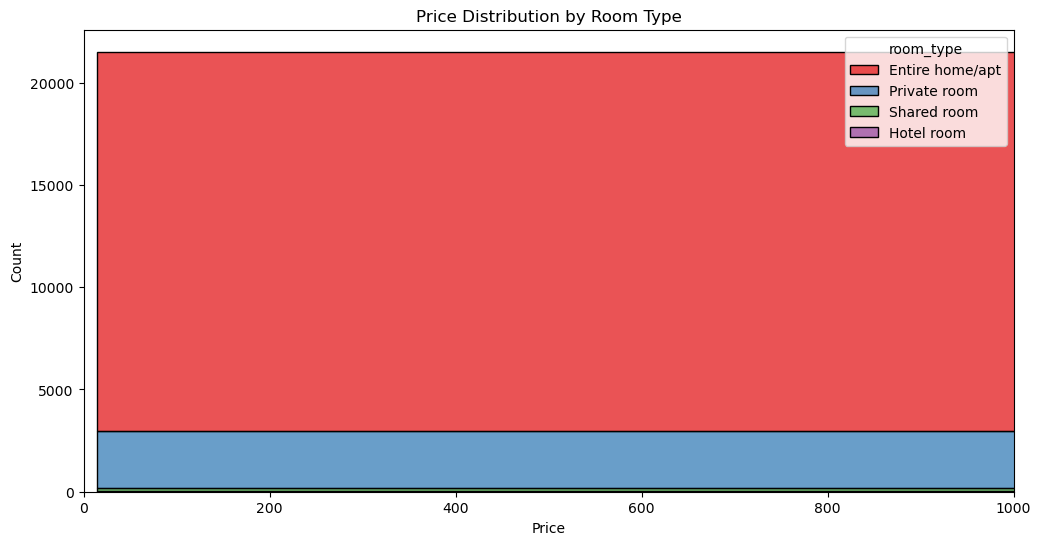

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(data=listings, x='price', hue='room_type', multiple='stack', palette='Set1', bins=50)
plt.title('Price Distribution by Room Type')
plt.xlabel('Price')
plt.ylabel('Count')
plt.xlim(0, 1000)
plt.show()

##### The histogram reveals that the highest prices are generally associated with entire home/apartment listings. This is expected as these listings offer more space, privacy, and amenities compared to other room types. Families, groups, and travelers looking for a more private and self-contained accommodation option typically prefer entire homes/apartments, thus justifying the higher prices.

##### Private room listings are priced moderately compared to entire home/apartments. These listings appeal to solo travelers, couples, or individuals who do not mind sharing common spaces with the host or other guests. Private rooms offer a balance between cost and privacy, making them an attractive option for budget-conscious travelers who still want some level of privacy.

##### Shared room listings seem to have the lowest prices. These accommodations are ideal for travelers who are extremely budget-conscious and do not mind sharing sleeping areas with others. Shared rooms are less common, indicating that while they are the most affordable option, the demand for such arrangements is relatively low compared to private rooms and entire homes/apartments.

##### Airbnb can tailor its marketing campaigns based on room type preferences. For example, advertising campaigns can highlight the privacy and space of entire homes/apartments for families or groups, while emphasizing affordability and local experiences for private room listings.

### Price by neighbourhood:

##### Calculate average prices by neighbourhood. Sorting them and limiting to the top 20.

In [6]:
avg_price_neighbourhood = listings.groupby('neighbourhood')['price'].mean().reset_index()
avg_price_neighbourhood = avg_price_neighbourhood.sort_values(by='price', ascending=False).head(20)

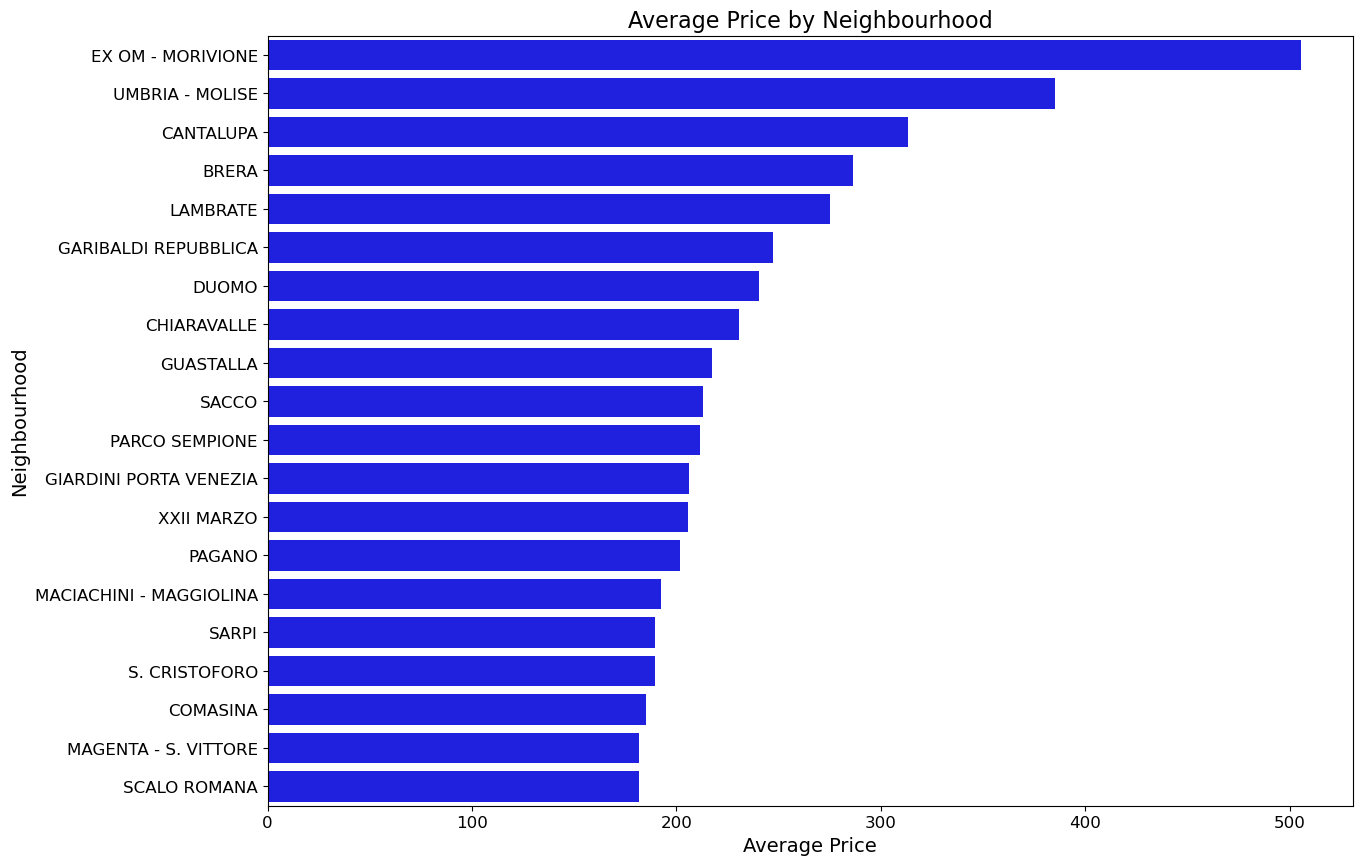

In [7]:
# Visualizing with a bar plot
plt.figure(figsize=(14, 10))
sns.barplot(x='price', y='neighbourhood', data=avg_price_neighbourhood, color='blue')
plt.title('Average Price by Neighbourhood', fontsize=16)
plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Neighbourhood', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##### The neighborhood with the longest bar in the bar plot, Ex Om - Morivione, stands out as the area with the highest average prices for Airbnb listings. This indicates that Ex Om - Morivione is likely a high-demand area, offering luxurious accommodations or prime locations that attract premium travelers.Travelers seeking upscale experiences or convenient locations may find Ex Om - Morivione particularly appealing, making it a strategic target for premium marketing campaigns. 
    
##### Hosts in this area have the opportunity to generate higher revenue per booking compared to other neighborhoods. Airbnb can leverage this insight to tailor its marketing efforts and promotional strategies to attract both hosts and guests seeking upscale accommodations.

### Price Correlation with other factors:

In [8]:
# Select columns for correlation analysis
columns_of_interest = ['price', 'number_of_reviews', 'minimum_nights', 'availability_365']

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

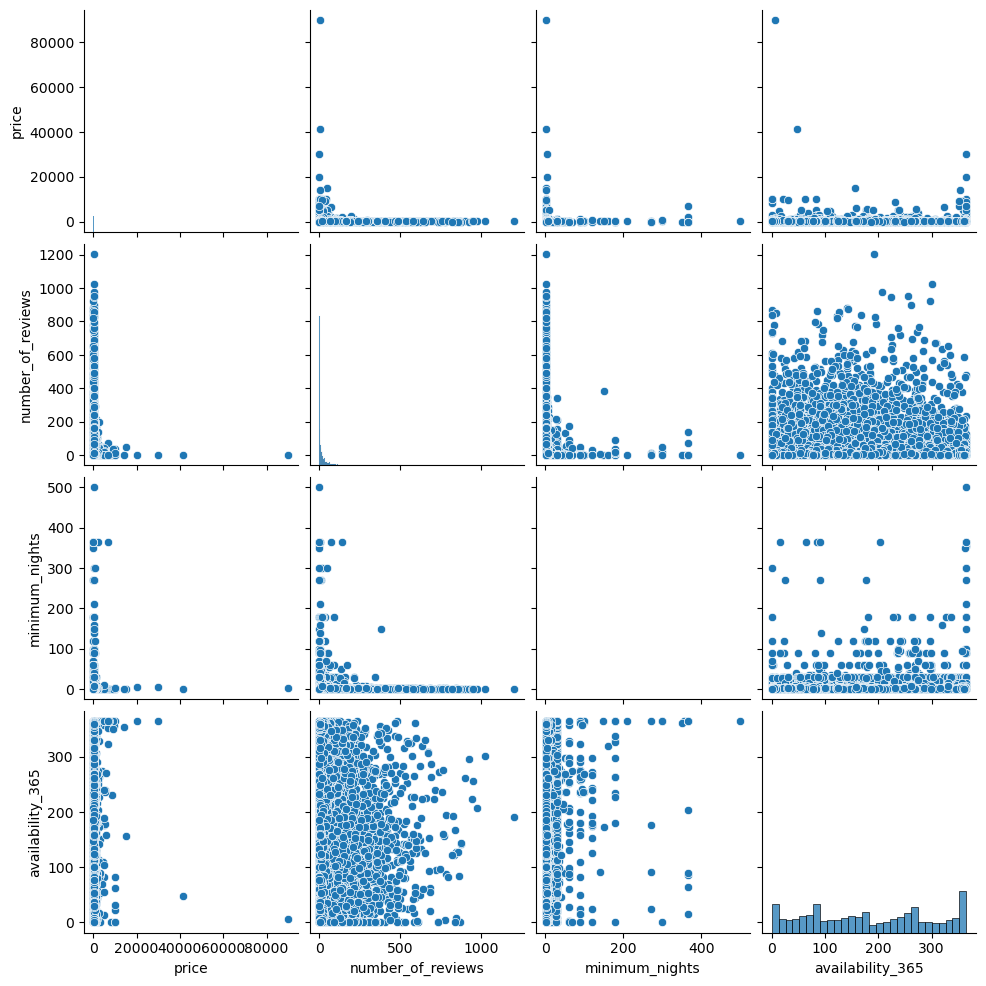

In [9]:
sns.pairplot(listings[columns_of_interest])
plt.show()

##### This pairplot visualization highlights the multifaceted nature of Airbnb listings and the complex interplay between different factors. Understanding these relationships can inform hosts and guests alike, enabling informed decision-making regarding pricing, booking policies, and accommodation preferences.

### Host Analysis:

##### Top Hosts in Milan Airbnbs':

In [10]:
host_listings = listings.groupby(['host_id', 'host_name']).size().reset_index(name='num_listings')

In [11]:
top_hosts = host_listings.sort_values(by='num_listings', ascending=False).head(10)

In [12]:
print("Top Hosts based on Number of Listings:")
print(top_hosts)

Top Hosts based on Number of Listings:
        host_id       host_name  num_listings
3997   27693585      Italianway           489
1766    9025189  Easylife House           272
2766   16366171  Cleanbnb House           259
954     4417813   The Best Rent           155
541     2504885          Simone           128
8531  230140176        Youhosty           124
5650   54050937          I-Host           116
3026   18593362         Hintown           115
8317  207076474        Federica           108
2600   14743308   Casa Da Suite           104


### The analysis reveals the top hosts on the Airbnb platform, ranked by the number of listings they offer. Here are the key insights on the top 6 hosts:

#### 1. Italianway (Host ID: 27693585):
   
##### Italianway emerges as the top host with an impressive 488 listings. Their substantial presence in the Airbnb marketplace signifies a strong foothold in the hospitality industry, offering a diverse range of accommodations to cater to various traveler preferences.

#### 2. Easylife House (Host ID: 9025189)
    
##### Easylife House secures the second position with 272 listings, reflecting a significant commitment to providing lodging options for Airbnb guests. 

#### 3. Cleanbnb House (Host ID: 16366171)

##### Cleanbnb House follows closely with 258 listings, showcasing a dedication to maintaining clean and well-maintained accommodations for guests. 

#### 4. The Best Rent (Host ID: 4417813)
    
##### The Best Rent ranks fourth with 155 listings, demonstrating a notable presence in the Airbnb ecosystem. 
  
#### 5. Simone (Host ID: 2504885)
    
##### Simone features prominently with 128 listings, reflecting a strong entrepreneurial spirit and commitment to providing quality lodging experiences. Their offerings likely appeal to guests seeking personalized and authentic stays.
    
#### 6. Youhosty (Host ID: 230140176)

##### Youhosty maintains a significant presence with 124 listings, highlighting a dedication to hosting and hospitality. 

### Summary statistics of the data:

In [13]:
listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.210600e+04,2.210600e+04,0.0,22106.000000,22106.000000,21591.000000,22106.000000,22106.000000,17725.000000,22106.000000,22106.000000,22106.000000
mean,5.484298e+17,1.723890e+08,NaN,45.471695,9.187798,171.816405,3.545553,33.920474,1.606279,30.523025,182.175518,12.142179
std,4.535959e+17,1.894874e+08,NaN,0.020865,0.029653,801.096933,13.402310,75.987913,1.916521,84.181735,113.119898,21.019365
min,6.400000e+03,1.054800e+04,NaN,45.396920,9.062310,14.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.770930e+07,1.826437e+07,NaN,45.455004,9.169521,79.000000,1.000000,1.000000,0.300000,1.000000,83.000000,0.000000
50%,7.260711e+17,6.998014e+07,NaN,45.471210,9.187470,105.000000,2.000000,8.000000,0.910000,2.000000,175.000000,3.000000
75%,9.644562e+17,3.293559e+08,NaN,45.487006,9.209950,160.000000,2.000000,31.000000,2.150000,11.000000,270.000000,14.000000
max,1.119382e+18,5.685713e+08,NaN,45.535420,9.271249,90000.000000,500.000000,1206.000000,28.370000,489.000000,365.000000,483.000000
